# Описание проекта

Мы — аналитики крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 

Проект состоит из двух частей:

__Первая часть-приоритизация гипотез.__

Будем использовать файл, в котором 9 гипотез по увеличению выручки интернет-магазина, где:
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Наша задача:
* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.


__Вторая часть-анализ A/B-теста.__


Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv. В которых:

Файл /datasets/orders.csv
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Наша задача проанализировать А/В-тест, а именно:

1. Постройть график кумулятивной выручки по группам.
2. Постройть график кумулятивного среднего чека по группам. 
3. Постройть график относительного изменения кумулятивного среднего чека группы B к группе A.
4. Постройть график кумулятивного среднего количества заказов на посетителя по группам. 
5. Постройть график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
6. Постройть точечный график количества заказов по пользователям. 
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Постройть точечный график стоимостей заказов.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
14. Принять решение по результатам теста и объяснить его. Варианты решений:
*  Остановить тест, зафиксировать победу одной из групп.
*  Остановить тест, зафиксировать отсутствие различий между группами.
*  Продолжить тест.


## Приоритизация гипотез.

In [1]:
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hypothesis=pd.read_csv('/Users/juliagrebeneva/Downloads/Яндекс учеба/13 спринт. Принятие решений в бизнесе/проект/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
#Применяем фреймворк ICE для приоритизации гипотез. Сортируем их по убыванию приоритета.
hypothesis['ICE']=round(hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts'],2)
pd.set_option('max_colwidth', 200)
hypothesis.sort_values(by='ICE',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Согласно получившийся таблице наиболее перспективные гипотезы 8,0,7.

In [4]:
#Применяем фреймворк RICE для приоритизации гипотез. Сортируем их по убыванию приоритета.
hypothesis['RICE']=hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis.sort_values(by='RICE',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### Вывод


Гипотезы 7 и 0 все еще остаются в топах перспективных гипотез. И к ним так же добавляются гипотезы 2 и 6. Гипотеза 8 переходит на 5 место.
Это связано с тем, что к формуле для метода RICE добавляется еще один множитель, а именно Reach-охват. Для гипотезы 8, охват оценивается всего в 1 бал, потому что "акция в день рождения" не приведет много людей. Когда, как для гипотезы 2, охват отценивается в 8 баллов, поэтому она переходит на второе место в рейтинге. Мы можем проверить ее первой, так как кроме большого охвата, стоимость тестирования этой гипотезы одна из самых низких (Efforts=3). 

## Анализ A/B-теста


### Открываем файлы

In [5]:
orders=pd.read_csv('/Users/juliagrebeneva/Downloads/Яндекс учеба/13 спринт. Принятие решений в бизнесе/проект/orders.csv')
print(orders.head())
print(orders.info())
print(orders.isna().sum())
print('Дубликаты:',orders.duplicated().sum())

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Дубликаты: 0


В датафрейме 1197 строк. Нет дубликатов и пропусков в значениях. Поменяем тип данных для столбца date.

In [6]:
orders['date']=orders['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [7]:
len(orders['visitorId'].unique())

1031

In [8]:
x=orders.pivot_table(index='visitorId',values='group',aggfunc='nunique')
x.columns=['groups']

In [9]:
x.loc[x.loc[:,'groups']==2].count()

groups    58
dtype: int64

Пользователей, которые попали в обе группы 58. Это очень маленький процент от всего датасета (примерно 6). Мы можем сотавить их, так как мы не знаем причины, почему они попали в обе группы. В реальной задаче нужно было бы идти и разбираться правда ли это не смещает выборки. Таких пользователей немного, но их исключением мы могли бы убрать влияние из обеих групп.

В данном случае таблица с визитами содержит уже агрегированные данные, эффективно очистить обе таблицы не получится, поэтому пользователей можно оставить в тесте.


In [10]:
visitors=pd.read_csv('/Users/juliagrebeneva/Downloads/Яндекс учеба/13 спринт. Принятие решений в бизнесе/проект/visitors.csv', sep=',')
print(visitors.head())
print(visitors.info())
print(visitors.isna().sum())
print('Дубликаты:',visitors.duplicated().sum())

         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
date        0
group       0
visitors    0
dtype: int64
Дубликаты: 0


В датафрейме 62 строки. Нет дубликатов и пропусков в значениях. Поменяем тип данных для столбца date.

In [11]:
visitors['date']=visitors['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Анализ А/В-теста

#### Собираем нужный для анализа датафрейм

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: 

* date — дата;
* group — группа A/B-теста (A или B);
* orders — кумулятивное количество заказов на указанную дату в указанной группе;
* buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
* revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
* visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [12]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 



        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Проверяем, корректно ли был создан датафрейм cumulativeData. Совпадают ли минимальная и максимальная даты в этом датафрейме с минимальной и максимальной датой в исходных данных.


In [14]:
print('Минимальная и максимальная даты в исходном visitors:', visitors['date'].min(),',', visitors['date'].max())
print ('Минимальная и максимальная даты в исходном orders:', orders['date'].min(),',', orders['date'].max())
print('Минимальная и максимальная даты в получившемся cumulativeData:', cumulativeData['date'].min(),',', cumulativeData['date'].max())

Минимальная и максимальная даты в исходном visitors: 2019-08-01 00:00:00 , 2019-08-31 00:00:00
Минимальная и максимальная даты в исходном orders: 2019-08-01 00:00:00 , 2019-08-31 00:00:00
Минимальная и максимальная даты в получившемся cumulativeData: 2019-08-01 00:00:00 , 2019-08-31 00:00:00


Даты в файлах совпадают, значит файл cumulativeData создан коректно.

#### Строим график кумулятивной выручки по группам.

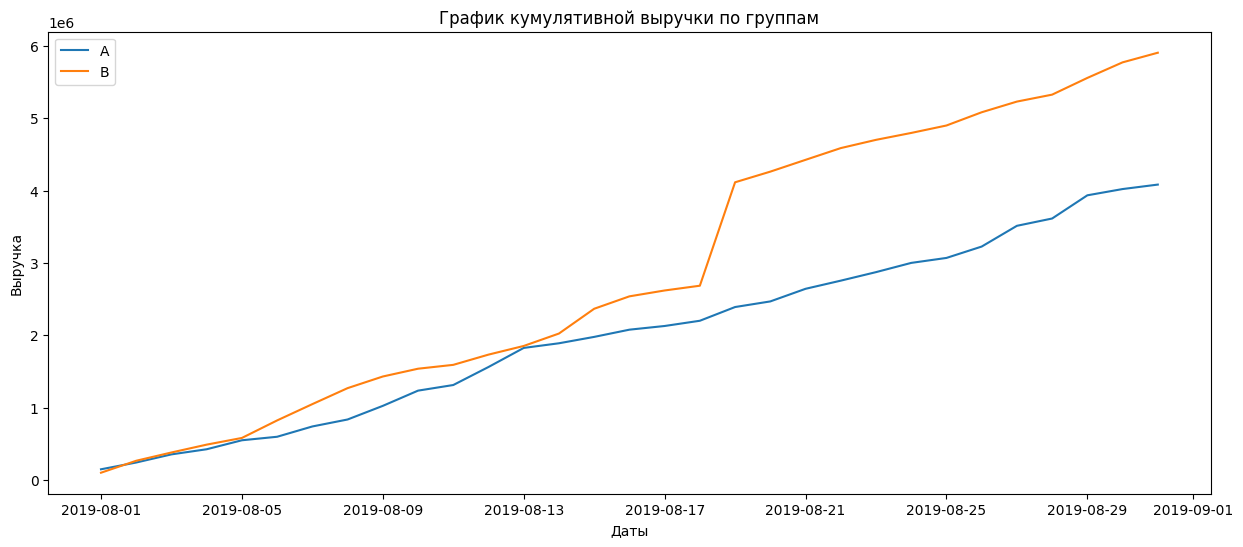

In [15]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# задаем размеры графика
plt.figure(figsize=(15,6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Даты')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')
plt.legend() ;

Выручка почти равномерно увеличивается в течение всего теста. Однако для группы В виден резкое увеличение после 17 августа. Возможно был всплеск заказов, или появились очень дорогие заказы.

#### Строим  график кумулятивного среднего чека по группам.


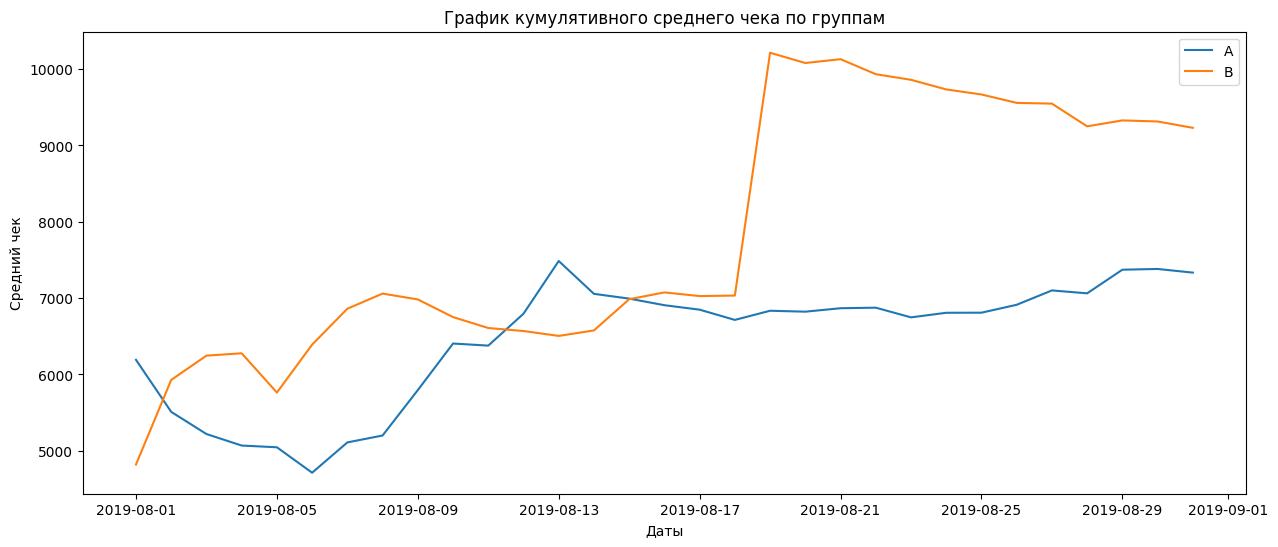

In [16]:
# задаем размеры графика
plt.figure(figsize=(15,6))

# разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xlabel('Даты')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')
plt.legend();

Средний чек к концу теста тоже становится равномерным: для группы В после резкого скачка 17 августа продолжает падать, для группы А утановился около 7000. Нужно будет проверить этот резкий скачок для группы В. 

#### Строим график относительного изменения кумулятивного среднего чека группы B к группе A. 

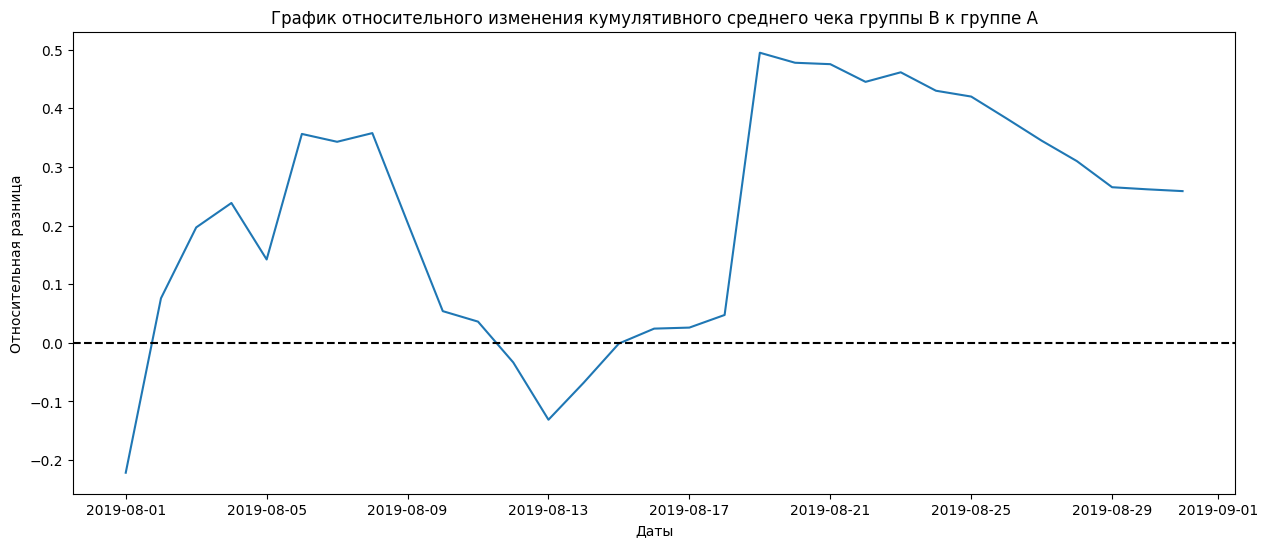

In [17]:
# задаем размеры графика
plt.figure(figsize=(15,6))
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)


plt.xlabel('Даты')
plt.ylabel('Относительная разница')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

В нескольких точках график различия между сегментами резко "скачет", но к концу теста, есть небольшой участок с установившимся значением.

#### Строим график кумулятивного среднего количества заказов на посетителя по группам. 

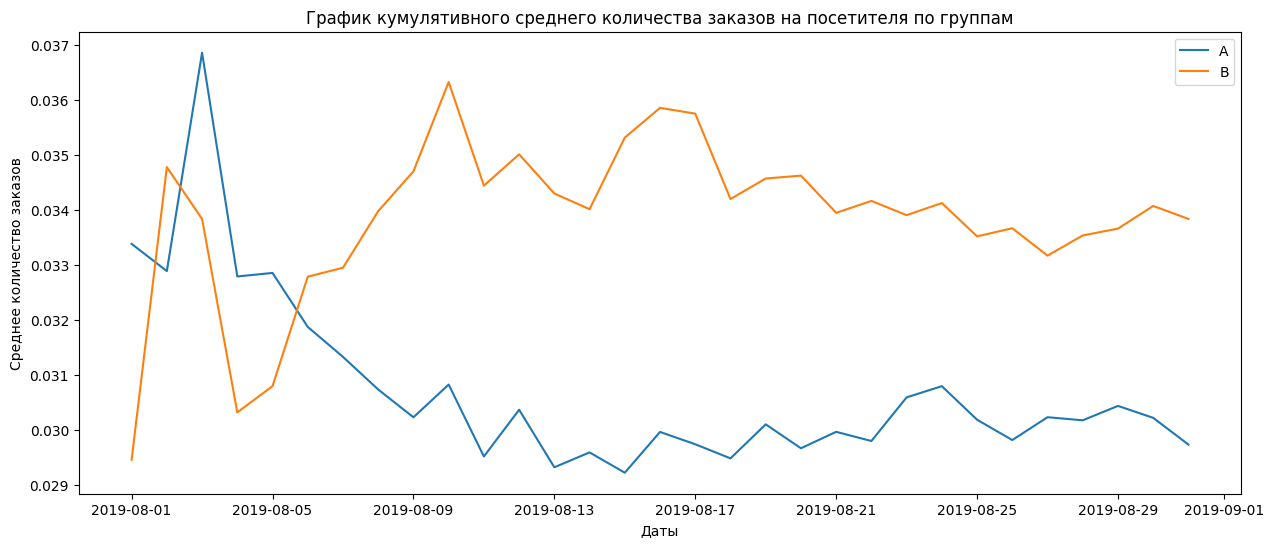

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulatiVevisitorsA = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulatiVevisitorsB = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]

# задаем размеры графика
plt.figure(figsize=(15,6))

# разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulatiVevisitorsA['date'], cumulatiVevisitorsA['orders']/cumulatiVevisitorsA['visitors'], label='A')
plt.plot(cumulatiVevisitorsB['date'], cumulatiVevisitorsB['orders']/cumulatiVevisitorsB['visitors'], label='B')

plt.xlabel('Даты')
plt.ylabel('Среднее количество заказов')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend();

В начале теста были большие скачки для обеих групп, но после 17 августа значения начали устаналиваться. Для группы В на конец периода значение среднего количества заказов на посетителя примерно на 13% выше, чем для группы А. Группа В выигрывает на протяжении всего теста.

#### Строим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

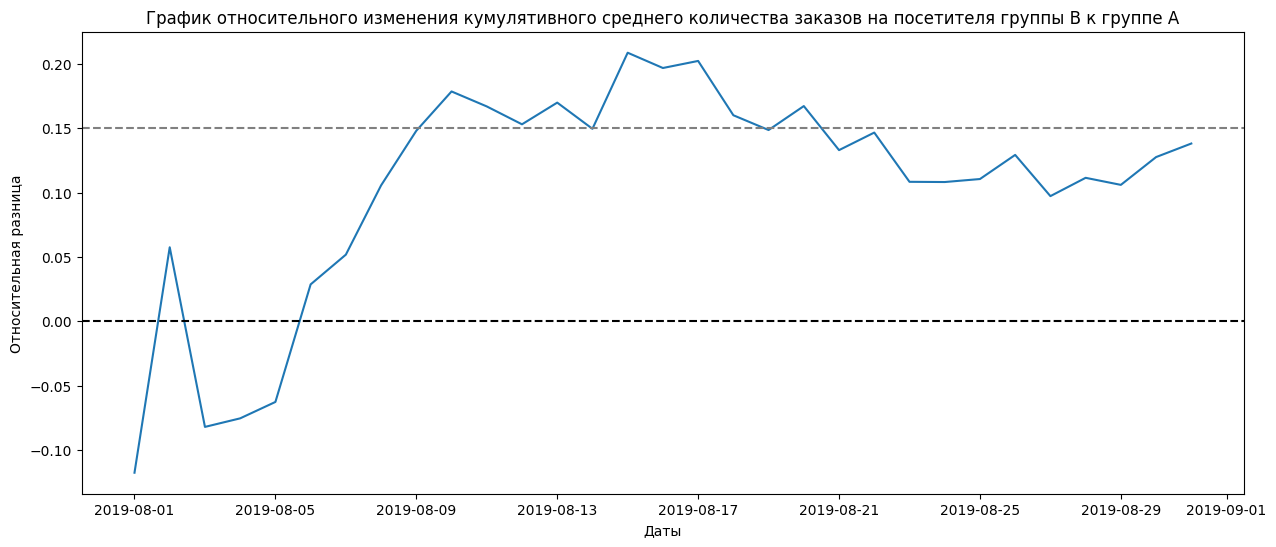

In [19]:

# задаем размеры графика
plt.figure(figsize=(15,6))
# собираем данные в одном датафрейме
mergedCumulativeVevisitors = cumulatiVevisitorsA.merge(cumulatiVevisitorsB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeVevisitors['date'], (mergedCumulativeVevisitors['ordersB']/mergedCumulativeVevisitors['visitorsB'])/(mergedCumulativeVevisitors['ordersA']/mergedCumulativeVevisitors['visitorsA'])-1)

plt.xlabel('Даты')
plt.ylabel('Относительная разница')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=0.15, color='grey', linestyle='--');

Для удобства добавили еще одну линию серым цветом на значение 0.15 по оси y, так как около этого значения намечается тенденция к стабилизации.


В начале теста группы В значительно проигровала группе А. Потом вырвалась вперед и на протяжении всего теста среднее количество заказов было выше, чем у группы А. Под конец теста, мы видим что, эта величена начинает расти.

#### Строим точечный график количества заказов по пользователям. Считаем 95-й и 99-й перцентили количества заказов на пользователя. Выбираем границу для определения аномальных пользователей

In [20]:
# собираем файл с количеством заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Есть пользователи, которые совершали по 11,9,8,5 заказов. Значительно больше, чем обычный пользователь в неделю.

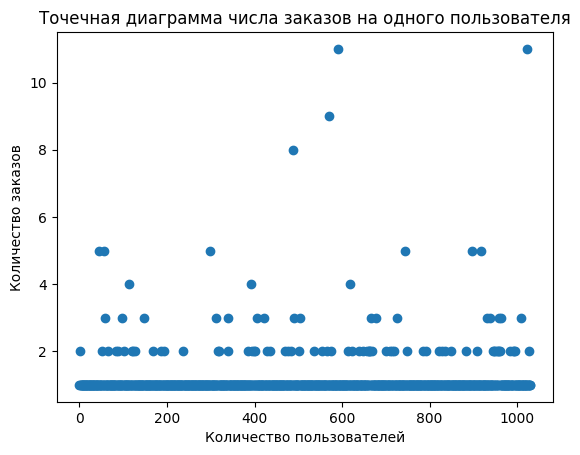

In [21]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.title('Точечная диаграмма числа заказов на одного пользователя');

Большинство пользователей заказывали один раз, но пользователей с 2-3 заказами тоже много. Не ясна их точная  доля не ясна, поэтому нужно посчитать выборочные перцентили количества заказов на одного пользователя.

In [22]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


Не более 5% пользователей оформляли больше, чем 2 заказа, не более 1% - больше 4 заказов. Стоит выбрать 2 заказа как верхнюю границу и отсеять аномальных пользователей по ней.

#### Строим точечный график стоимостей заказов. Считаем 95-й и 99-й перцентили стоимости заказов. Выбираем границу для определения аномальных заказов.

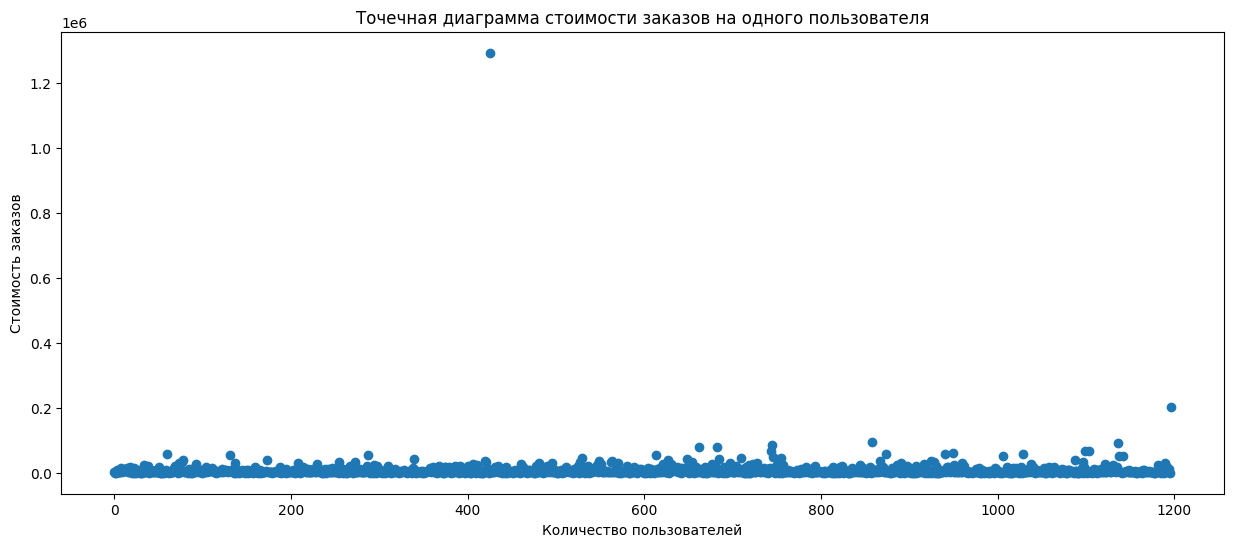

In [23]:
plt.figure(figsize=(15,6))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.title('Точечная диаграмма стоимости заказов на одного пользователя');

Добавим еще один график, ограничив значения по оси Y. Чтобы двух явных выбросов не было видно, а мы могли рассмотреть основную часть заказов.

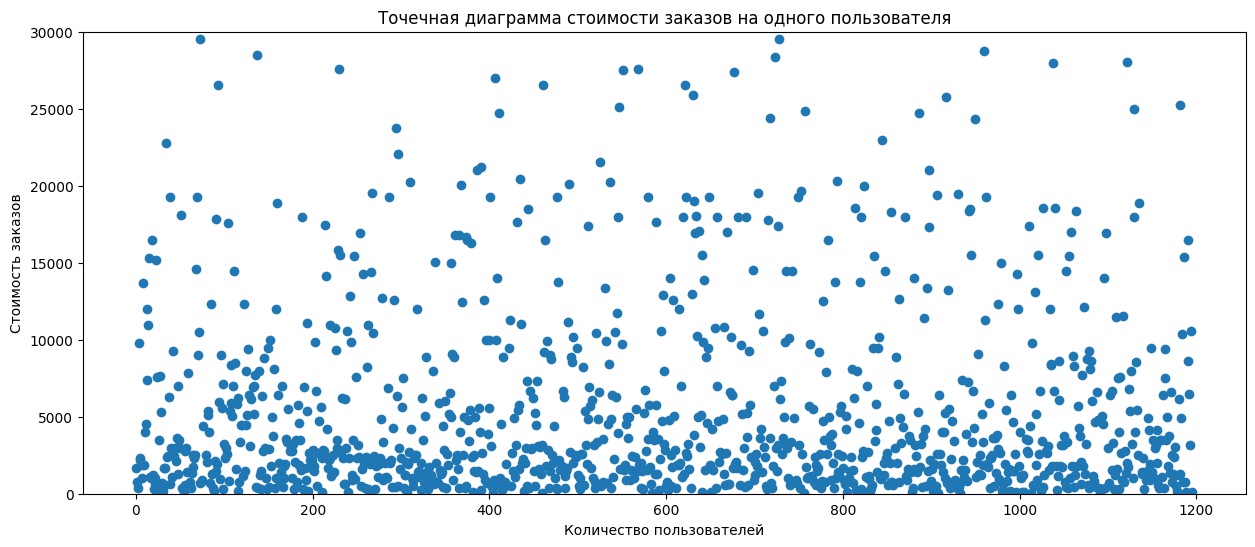

In [24]:
plt.figure(figsize=(15,6))
plt.ylim([0, 30000])
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.title('Точечная диаграмма стоимости заказов на одного пользователя');

По графику видно, что в основном стоимость заказа доходила примерно до 15 тысяч, но есть большие значения больше 120 тысяч. Посчитаем выборочные перцентили.

In [25]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Получается, что только 5 % пользователей делали заказы свыше 28 тысяч, и только 1% свыше 58 тысяч. За границу будем ставить 28 тысяч, чтобы убрать от 1 до 5% пользователей с дорогими заказами.

#### Считаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Сначала небходимо подготовить данные и собрать их в одной таблице.

In [26]:
# считаем количество пользователей в выбранную дату в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# считаем количество пользователей в выбранную дату в группе B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']


data = (
    visitorsADaily.merge(
        visitorsBDaily, left_on='date', right_on='date', how='left'
    )
    
)

print(data.head(5)) 

        date  visitorsPerDateA  visitorsPerDateB
0 2019-08-01               719               713
1 2019-08-02               619               581
2 2019-08-03               507               509
3 2019-08-04               717               770
4 2019-08-05               756               707


Посчитаем статистическую значимость различия в среднем количестве заказов между группами. 

Сформулируем гипотезы. Нулевая: Статистически значимых различий в среднем количестве заказов между группами по "сырым" данным нет. Альтернативная: Статистически значимых различий в среднем количестве заказов между группами по "сырым" данным есть.

Значение alpha возьмем равное 0.05. Проверку будем выполнять критерием Манна-Уитни,так как мы отказываемся от предположения нормальности распределения и одинаковых дисперсий, а так же помним о сущесвовании выбросов в данных.

In [27]:
# создаем переменные, в которых для пользователей, сделавших хотя бы 1 заказ, указываем число совершенных заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# объявляем переменные, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули.
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
# применяем критерий Манна-Уитни
print("p-value = {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

# выведим относительный прирост среднего числа заказов группы B
print("Относительный прирост среднего числа заказов группы B = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительный прирост среднего числа заказов группы B = 0.138


По "сырым" данным различия в среднем числе заказов групп А и В есть, p-value меньше 0.05, а значит мы можем отвергнуть нулевую гипотезу в пользу альтернативной.  И среднее число заказов группы В примерно на 14% больше, чем группы А.

#### Считаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Нулевая гипотеза: Статистически значимых различий в среднем чеке по "сырым" данным между группами нет. Альтернативная гипотеза:  Статистически значимых различий в среднем чеке по "сырым" данным между группами есть. 

Значение alpha возьмем равное 0.05. Проверку будем выполнять критерием Манна-Уитни. 

In [28]:
print('p-value =  {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего числа заказов группы B = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value =  0.729
Относительный прирост среднего числа заказов группы B = 0.259


P-value = 0.729 значительно больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, не отвергаем. Средний чек группы В отличается от среднего чека группы А на 25%. Далее посчитаем статистическую значимость различий по "очищенным" данным.

#### Считаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Сначала, сделаем срезы пользователей с числом заказов больше 2, и пользователей совершивших заказы дороже 28 тысяч.Объядиним их в одной таблице, и посчитаем сколько всего таких пользователей.

In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > (np.percentile(ordersByUsers['orders'], 95))]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > (np.percentile(ordersByUsers['orders'], 95))]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > (np.percentile(orders['revenue'], 95))]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


Всего 74 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. 

Сформулируем гипотезы. Нулевая: Статистически значимых различий в среднем количестве заказов между группами по "очищенным" данным нет. Альтернативная: Статистически значимых различий в среднем количестве заказов между группами по "очищенным" данным есть.

Значение alpha возьмем равное 0.05. Проверку будем выполнять критерием Манна-Уитни. 

Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [30]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [31]:
print('p-value {0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value 0.013
Относительный прирост среднего числа заказов группы B = 0.173


Результаты по среднему количеству заказов практически не изменились, и следовательно, мы можем отвергнуть нулевую гипотезу.

#### Cчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Нулевая гипотеза: Статистически значимых различий в среднем чеке по "очищенным" данным между группами нет. Альтернативная гипотеза:  Статистически значимых различий в среднем чеке по "очищенным" данным между группами есть. 

Значение alpha возьмем равное 0.05. Проверку будем выполнять критерием Манна-Уитни. 

In [32]:
print(
    ' p-value {0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего числа заказов группы B =  {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


 p-value 0.738
Относительный прирост среднего числа заказов группы B =  -0.020


P-value немного увеличился по сравнению с "сырыми" данными, а значит нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет мы так же не отвергаем. Разница между сегментами сократилась с 25% до -2%. Это значит, что по "очищенным" данным группа В проигрывает группе А в среднем чеке заказов.


#### Еще раз построим графики относительных изменений

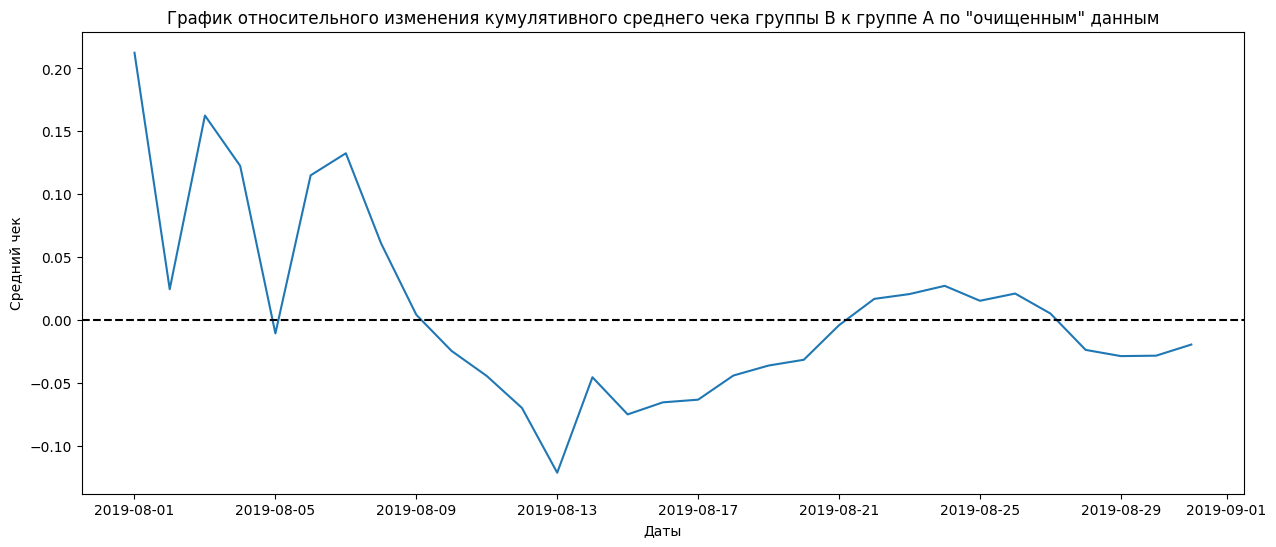

In [33]:
# удалим выбросы
orders1=orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders1[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders1[np.logical_and(orders1['date'] <= x['date'], orders1['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


# задаем размеры графика
plt.figure(figsize=(15,6))
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A по "очищенным" данным')
plt.xlabel('Даты')
plt.ylabel('Средний чек')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

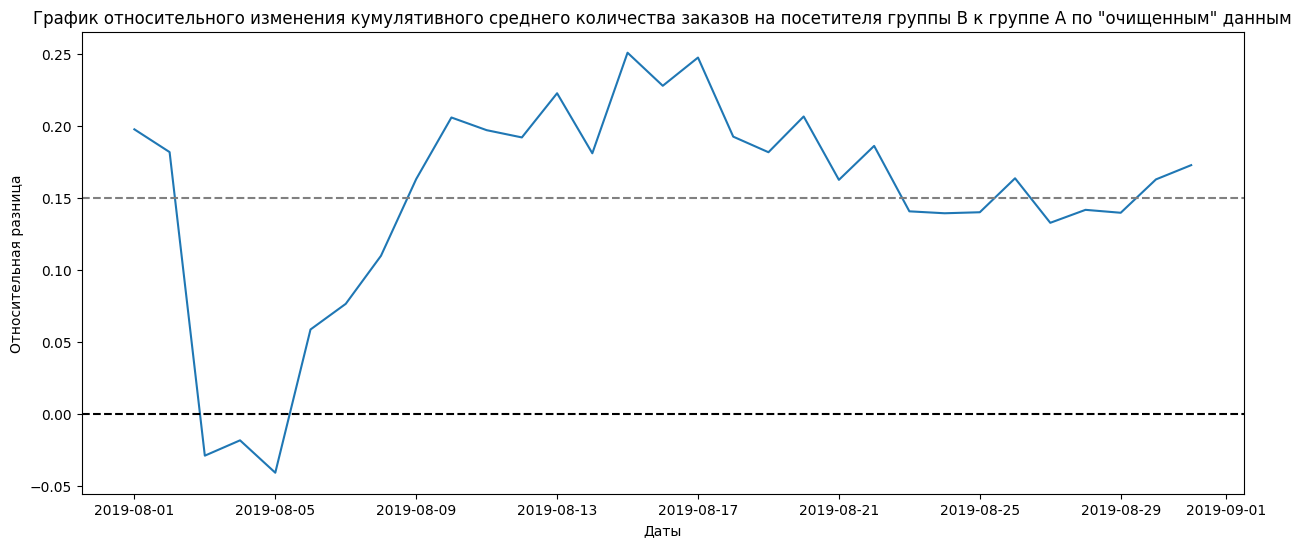

In [34]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulatiVevisitorsA = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulatiVevisitorsB = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]

# задаем размеры графика
plt.figure(figsize=(15,6))
# собираем данные в одном датафрейме
mergedCumulativeVevisitors = cumulatiVevisitorsA.merge(cumulatiVevisitorsB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeVevisitors['date'], (mergedCumulativeVevisitors['ordersB']/mergedCumulativeVevisitors['visitorsB'])/(mergedCumulativeVevisitors['ordersA']/mergedCumulativeVevisitors['visitorsA'])-1)

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A по "очищенным" данным')

plt.xlabel('Даты')
plt.ylabel('Относительная разница') 
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--');


### Вывод

* Есть статистически значимое различия по среднему количеству заказов между группами по «сырым» и по данным после фильтрации аномалий, и разница составляем примерно 14%;

* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

* График различия среднего количества заказов между группами сообщает, что результаты группы В значительно лучше группы А. И эта величина  продолжает расти.

* График различия среднего чека говорит о том, что результаты группы меняются в течении теста. После 21 августа лучшие результаты были у группы В, после 25 августа у А. Но виден рост, а значит увеличение среднего чека для группы В.


Исходя из обнаруженных фактов, тест можно остановить и признать его успешным. 